In [17]:
import pandas as pd
import numpy as np
from tsfresh.feature_extraction import feature_calculators as fc

### Creating Data from date column

In [18]:
s = pd.date_range('2020-01-01' , '2020-01-10', freq= '10H').to_series()

In [19]:
features = {
    'dayofweek' : s.dt.day_of_week.values,
    'dayofyear' : s.dt.day_of_year,
    'dayinmonth' : s.dt.days_in_month,
    'isleapyear' : s.dt.is_leap_year,
    'weekofyear' : s.dt.weekofyear
}

/var/folders/6t/5s3hsvmd07s_2xlbgyf48wnw0000gn/T/ipykernel_3844/992637899.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  'weekofyear' : s.dt.weekofyear


In [20]:
df = pd.DataFrame(features)

In [21]:
df.head()

,dayofweek,dayofyear,dayinmonth,isleapyear,weekofyear
2020-01-01 00:00:00,2,1,31,True,1
2020-01-01 10:00:00,2,1,31,True,1
2020-01-01 20:00:00,2,1,31,True,1
2020-01-02 06:00:00,3,2,31,True,1
2020-01-02 16:00:00,3,2,31,True,1


### Using Aggregates

In [32]:
s = pd.date_range('2020-01-01' , '2022-01-10', freq= '10D').to_series()

In [33]:
len(s)

75

In [34]:
features = {
    'day' : s,
    'month' : s.dt.month,
    'dayofweek' : s.dt.day_of_week.values,
    'dayofyear' : s.dt.day_of_year,
    'dayinmonth' : s.dt.days_in_month,
    'isleapyear' : s.dt.is_leap_year,
    'weekofyear' : s.dt.weekofyear
}
df = pd.DataFrame(features)
df.head()

/var/folders/6t/5s3hsvmd07s_2xlbgyf48wnw0000gn/T/ipykernel_3844/1392445170.py:8: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  'weekofyear' : s.dt.weekofyear


,day,month,dayofweek,dayofyear,dayinmonth,isleapyear,weekofyear
2020-01-01,2020-01-01,1,2,1,31,True,1
2020-01-11,2020-01-11,1,5,11,31,True,2
2020-01-21,2020-01-21,1,1,21,31,True,4
2020-01-31,2020-01-31,1,4,31,31,True,5
2020-02-10,2020-02-10,2,0,41,29,True,7


In [35]:
import random

company_ids = ['abc100', 'abc101', 'abc102', 'abc103', 'abc104', 'abc105', 'abc106', 'abc107', 'abc108', 'abc109', 'abc110']
df['company_id'] = [random.choice(company_ids) for i in range(len(df))]
df.set_index('company_id', inplace=True)

In [36]:
aggs = {}

aggs['month'] = ['nunique', 'mean']
aggs['dayofyear'] = ['nunique', 'mean']
aggs['weekofyear'] = ['mean']

In [38]:
df_agg = df.groupby('company_id').agg(aggs)

In [39]:
df.join(df_agg)

/Users/arshad_221b/opt/anaconda3/envs/funproj/lib/python3.8/site-packages/pandas/core/frame.py:9126: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left,2 on the right)
  return merge(


,day,month,dayofweek,dayofyear,dayinmonth,isleapyear,weekofyear,"(month, nunique)","(month, mean)","(dayofyear, nunique)","(dayofyear, mean)","(weekofyear, mean)"
company_id,,,,,,,,,,,,
abc100,2020-03-01,3,6,61,31,True,9,7,6.555556,9,187.111111,27.111111
abc100,2020-03-31,3,1,91,31,True,14,7,6.555556,9,187.111111,27.111111
abc100,2020-05-30,5,5,151,31,True,22,7,6.555556,9,187.111111,27.111111
abc100,2020-09-27,9,6,271,30,True,39,7,6.555556,9,187.111111,27.111111
abc100,2021-06-14,6,0,165,30,False,24,7,6.555556,9,187.111111,27.111111
...,...,...,...,...,...,...,...,...,...,...,...,...
abc110,2020-08-18,8,1,231,31,True,34,5,6.166667,6,174.666667,25.333333
abc110,2020-10-07,10,2,281,31,True,41,5,6.166667,6,174.666667,25.333333
abc110,2021-02-24,2,2,55,28,False,8,5,6.166667,6,174.666667,25.333333


### Handling Series

In [41]:
from sklearn import preprocessing
import numpy as np

In [43]:
df = pd.DataFrame(
    np.random.rand(100,2),
    columns=[f"f_{i}" for i in range(1,3)]
)

In [44]:
df

,f_1,f_2
0,0.032392,0.365333
1,0.452620,0.658146
2,0.455357,0.623611
3,0.053640,0.742373
4,0.160552,0.094028
...,...,...
95,0.084223,0.038559
96,0.764594,0.729770
97,0.630108,0.286897
98,0.120824,0.447398


In [45]:
# feature_dict = {}

# # Just for the demo 

# # calculate mean
# feature_dict = np.mean(x)

# # calculate max
# feature_dict = np.max(x)

# # calculate standard deviation
# feature_dict = np.std()

# # calculte variance 
# feature_dict = np.var()

# # pecentile features
# feature_dict['percentile_10'] = np.percentile(x, 10)
# feature_dict['percentile_60'] = np.percentile(x, 60)
# feature_dict['percentile_90'] = np.percentile(x, 90)

# # quantile features (quantile is the subset of distribution)
# feature_dict['quantile_5'] = np.quantile(x, 0.05)
# feature_dict['quantile_95'] = np.quantile(x, 0.95)

### Creating polynomial features 

In [46]:
df.head(10)

,f_1,f_2
0,0.032392,0.365333
1,0.452620,0.658146
2,0.455357,0.623611
3,0.053640,0.742373
4,0.160552,0.094028
5,0.771452,0.327231
6,0.924535,0.732870
7,0.030289,0.530500
8,0.547589,0.454266
9,0.771939,0.830272


In [47]:
# initilize polynomial features class object

pf = preprocessing.PolynomialFeatures(
    degree= 2, 
    interaction_only=False, 
    include_bias=False
)

# fit to features
pf.fit(df)

#create polynomial features
poly_features = pf.transform(df)

# create df with all features
num_features = poly_features.shape[1]
df_transformed = pd.DataFrame(
    poly_features, 
    columns=[f"{i}" for i in range (1, num_features + 1)]
)

In [50]:
df_transformed # a2, b2, a*b 

,1,2,3,4,5
0,0.032392,0.365333,0.001049,0.011834,0.133469
1,0.452620,0.658146,0.204865,0.297890,0.433157
2,0.455357,0.623611,0.207350,0.283966,0.388891
3,0.053640,0.742373,0.002877,0.039821,0.551118
4,0.160552,0.094028,0.025777,0.015096,0.008841
...,...,...,...,...,...
95,0.084223,0.038559,0.007093,0.003248,0.001487
96,0.764594,0.729770,0.584603,0.557977,0.532564
97,0.630108,0.286897,0.397036,0.180776,0.082310
98,0.120824,0.447398,0.014598,0.054056,0.200165


In [57]:
df = pd.DataFrame(
    np.random.rand(100,3), # 3 columns
    columns=[f"f_{i}" for i in range(1,4)]
)



pf = preprocessing.PolynomialFeatures(
    degree= 3, # degree 3 
    interaction_only=False, 
    include_bias=False
)

# fit to features
pf.fit(df)

#create polynomial features
poly_features = pf.transform(df)

# create df with all features
num_features = poly_features.shape[1]

df_transformed = pd.DataFrame(
    poly_features, 
    columns=[f"{i}" for i in range (1, num_features + 1)]
)

df_transformed.head(10)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.345243,0.280088,0.071927,0.119193,0.096698,0.024832,0.078449,0.020146,0.005174,0.041151,0.033385,0.008573,0.027084,0.006955,0.001786,0.021973,0.005643,0.001449,0.000372
1,0.296160,0.504637,0.210890,0.087711,0.149453,0.062457,0.254659,0.106423,0.044474,0.025976,0.044262,0.018497,0.075420,0.031518,0.013172,0.128510,0.053705,0.022443,0.009379
2,0.270995,0.307130,0.563382,0.073438,0.083231,0.152674,0.094329,0.173032,0.317399,0.019901,0.022555,0.041374,0.025563,0.046891,0.086014,0.028971,0.053143,0.097483,0.178817
3,0.712104,0.383191,0.289045,0.507092,0.272872,0.205830,0.146836,0.110760,0.083547,0.361102,0.194313,0.146572,0.104562,0.078872,0.059494,0.056266,0.042442,0.032015,0.024149
4,0.068882,0.445416,0.479613,0.004745,0.030681,0.033037,0.198395,0.213627,0.230029,0.000327,0.002113,0.002276,0.013666,0.014715,0.015845,0.088368,0.095153,0.102458,0.110325
5,0.131235,0.157525,0.884323,0.017223,0.020673,0.116054,0.024814,0.139303,0.782026,0.002260,0.002713,0.015230,0.003257,0.018282,0.102630,0.003909,0.021944,0.123189,0.691564
6,0.243749,0.739208,0.349750,0.059414,0.180182,0.085251,0.546429,0.258538,0.122325,0.014482,0.043919,0.020780,0.133192,0.063019,0.029817,0.403925,0.191114,0.090424,0.042783
7,0.096782,0.165656,0.817686,0.009367,0.016032,0.079137,0.027442,0.135454,0.668610,0.000907,0.001552,0.007659,0.002656,0.013110,0.064709,0.004546,0.022439,0.110759,0.546713
8,0.864677,0.976459,0.767001,0.747666,0.844321,0.663207,0.953471,0.748944,0.588290,0.646489,0.730065,0.573460,0.824444,0.647595,0.508681,0.931025,0.731313,0.574441,0.451219
9,0.517025,0.302222,0.954068,0.267315,0.156257,0.493277,0.091338,0.288341,0.910245,0.138209,0.080789,0.255037,0.047224,0.149079,0.470620,0.027604,0.087143,0.275096,0.868436


### Using Binning 

In [63]:
df = pd.DataFrame(
    np.random.rand(100,2),
    columns=[f"f_{i}" for i in range(1,3)]
)

In [64]:
# 10 bins
df["f_bin_10"] = pd.cut(df["f_1"], bins = 10, labels=False)
df["f_bin_100"] = pd.cut(df["f_1"], bins = 100, labels=False)
df['f_bin_2'] = pd.cut(df["f_1"], bins=2, labels=["A", "B"],)

In [65]:
df

,f_1,f_2,f_bin_10,f_bin_100,f_bin_2
0,0.285847,0.963683,2,29,A
1,0.863097,0.850477,8,88,B
2,0.116966,0.525374,1,11,A
3,0.081824,0.206864,0,8,A
4,0.455848,0.258041,4,46,A
...,...,...,...,...,...
95,0.289346,0.250219,2,29,A
96,0.494499,0.342529,5,50,B
97,0.672977,0.448181,6,68,B
98,0.706399,0.978826,7,72,B


(array([10.,  9.,  9., 10., 12., 11.,  7., 17.,  6.,  9.]),
 array([ 0. ,  9.9, 19.8, 29.7, 39.6, 49.5, 59.4, 69.3, 79.2, 89.1, 99. ]),
 <BarContainer object of 10 artists>)

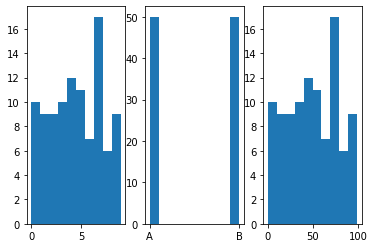

In [83]:
import matplotlib.pyplot as plt 

plt.subplot(1, 3, 1)
plt.hist(df.f_bin_10)

plt.subplot(1, 3, 2)
plt.hist(df.f_bin_2)

plt.subplot(1, 3, 3)
plt.hist(df.f_bin_100)